In [35]:
import pandas as pd
from pyspark import SparkContext
from pyspark.sql import SQLContext
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pylab as plt
plt.rcParams["figure.figsize"] = (20,6)

In [2]:
sc = SparkContext(appName="umsi618f22pj1")
sqlc = SQLContext(sc)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/10/26 13:57:52 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


/Users/yonniechan/opt/anaconda3/lib/python3.9/site-packages/pyspark/sql/context.py:112: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


# Read csv

In [20]:
products_df = sqlc.read.option("multiline", "true").csv("./Data/product_fashion_cleaned.csv", header = True, inferSchema = True)
products_df.show(200)
products_df.printSchema()

+--------------------+--------+--------------------+----------+
|               title|    rank|               brand|      asin|
+--------------------+--------+--------------------+----------+
|Slime Time Fall F...|13052976|Group Publishing ...|0764443682|
|Magical Things I ...|19308073|   Christopher Manos|1940280001|
|Ashes to Ashes, O...|19734184|Flickerlamp Publi...|1940735033|
|Womens Sexy Sleev...| 9854284|              Didala|5378828716|
|Sevendayz Men's S...|16147550|           sevendayz|6041002984|
|Envirosax Kids Se...|25698912|           Envirosax|8037200124|
|Envirosax Greengr...|25850143|           Envirosax|8037200221|
|Blessed by Pope B...|19411377|      Gifts by Lulee|8279996567|
|Tideclothes ALAGI...|21572343|         Tideclothes|9239282785|
|ALAGIRLS Straples...|22202218|         Tideclothes|9239281533|
|X. L. Carbon Fibe...| 3725957|         Roar Carbon|9654263246|
|Shimmer Anne Shin...|  468314|  Shimmer Anne Shine|B00004T3SN|
|SpongeBob Squarep...|23888557|SpongeBob

In [21]:
reviews_df = sqlc.read.option("multiline", "true").csv("./Data/review_fashion_cleaned.csv", header = True, inferSchema = True)
reviews_df.show(200)
reviews_df.printSchema()

+-------+----------+--------------------+----+
|overall|      asin|          reviewText|vote|
+-------+----------+--------------------+----+
|    5.0|7106116521|Exactly what I ne...|   0|
|    2.0|7106116521|I agree with the ...|   3|
|    2.0|7106116521| too tiny an opening|   0|
|    5.0|7106116521|Exactly what I wa...|   0|
|    4.0|7106116521|These little plas...|   0|
|    3.0|B00007GDFV|mother - in - law...|   0|
|    3.0|B00007GDFV|Item is of good q...|   0|
|    3.0|B00007GDFV|I had used my las...|   0|
|    4.0|B00007GDFV|This brand has be...|   0|
|    2.0|B00007GDFV|I smoke 100's and...|   0|
|    1.0|B00007GDFV|cheap and cheesy,...|   0|
|    1.0|B00007GDFV|I ordered a ladie...|   0|
|    4.0|B00007GDFV|Received the case...|   2|
|    3.0|B00007GDFV|Love it but it to...|   0|
|    5.0|B00007GDFV|I love it it is j...|   0|
|    3.0|B00007GDFV|It is smaller tha...|   0|
|    5.0|B00007GDFV|             love it|   0|
|    1.0|B00007GDFV|Don't like it. It...|   0|
|    4.0|B000

In [22]:
products_df.createOrReplaceTempView("products")
reviews_df.createOrReplaceTempView("reviews")

# Join two datasets on ASIN

In [278]:
q0 = sqlc.sql('''
    SELECT DISTINCT title, rank, brand, products.asin, overall, reviewText, vote
    FROM products, reviews
    WHERE reviews.asin = products.asin
    ;
    ''')

In [279]:
q0_df = q0.toPandas()

In [306]:
q0_df

,title,rank,brand,asin,overall,reviewText,vote
0,Sevendayz Men's Shady Records Eminem Hoodie Ho...,16147550,sevendayz,6041002984,5.0,"Loved it, shipped fast, arrived in about 10 da...",0
1,"X. L. Carbon Fiber Money Clip, made in the USA",3725957,Roar Carbon,9654263246,2.0,It was not the right size I was looking for. I...,0
2,"X. L. Carbon Fiber Money Clip, made in the USA",3725957,Roar Carbon,9654263246,5.0,This money clip worked as described. Holds ite...,0
3,"X. L. Carbon Fiber Money Clip, made in the USA",3725957,Roar Carbon,9654263246,5.0,"I been real happy with this clip, I tried a fe...",0
4,USA Patriotic Sun Visor Cap - Clearance Item,25766885,A&amp;E Designs,B00008NUQD,5.0,Great value for the price. Out whole group wi...,0
...,...,...,...,...,...,...,...
559424,Spring Fever Womens Stripes Lined Double Up wi...,5162780,Spring Fever,B01HI9HJKY,1.0,Let me start by saying I've never left a one s...,0
559425,Grayson Shop Womens Plus Size Assorted Print G...,7784299,Grayson Shop,B01HIQXO56,4.0,I like the shirt it fits well the only proble...,0
559426,Georgia Boot AMP Insole,496288,Georgia Boot,B01HIUEBF4,5.0,"These are incredible, I purchased a pair of Re...",0
559427,Georgia Boot AMP Insole,496288,Georgia Boot,B01HIUEBF4,5.0,My cat ate my insoles out of my Georgia slippe...,0


# 4.1 Whether Num_of_Reviews, Avg_ratings, Rating_power affect the product ranking, and find the top products

In [284]:
q1 = sqlc.sql('''
    SELECT rank, COUNT(*) AS Num_of_Reviews, ROUND(AVG(overall),2) AS Avg_ratings, ROUND(COUNT(*) * AVG(overall),2) AS Rating_power
    FROM products, reviews
    WHERE products.asin = reviews.asin
    GROUP BY rank
    HAVING Num_of_Reviews >= 40
    ORDER BY rank ASC
    ;
    ''')

In [285]:
q1_df = q1.toPandas()

In [292]:
q1_df[:1500].corr(method = 'pearson')

,rank,Num_of_Reviews,Avg_ratings,Rating_power
rank,1.000000,-0.218502,-0.320289,-0.232901
Num_of_Reviews,-0.218502,1.000000,0.084074,0.992350
Avg_ratings,-0.320289,0.084074,1.000000,0.151516
Rating_power,-0.232901,0.992350,0.151516,1.000000


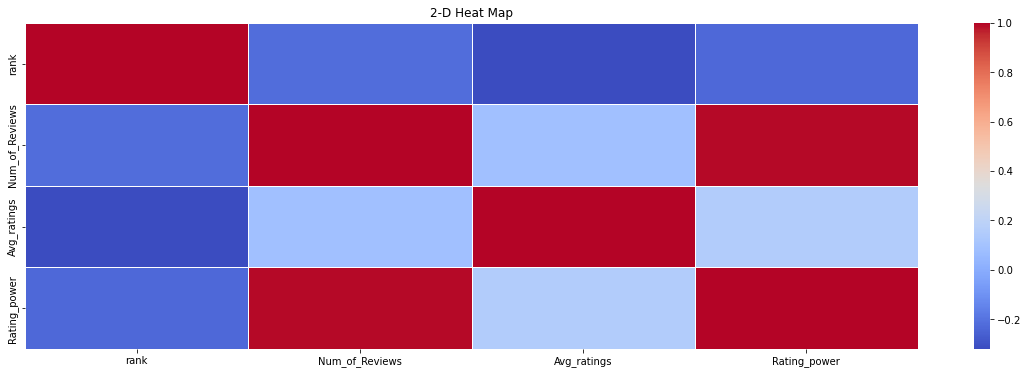

In [305]:
ax = sns.heatmap( q1_df[:1500].corr(method = 'pearson') , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()

In [193]:
def q1_plot(y, bins, scope = 0, axvline = (False,0,'r')):
    if not scope:
        plt.hist(q1_df['rank'], weights = q1_df[y], bins = bins)
    else:
        plt.hist(q1_df[:scope]['rank'], weights = q1_df[:scope][y], bins = bins)
    plt.xlabel('Rank')
    plt.ylabel(y)
    if axvline[0]:
        plt.axvline(x = axvline[1], color = axvline[2])
    plt.show()
        

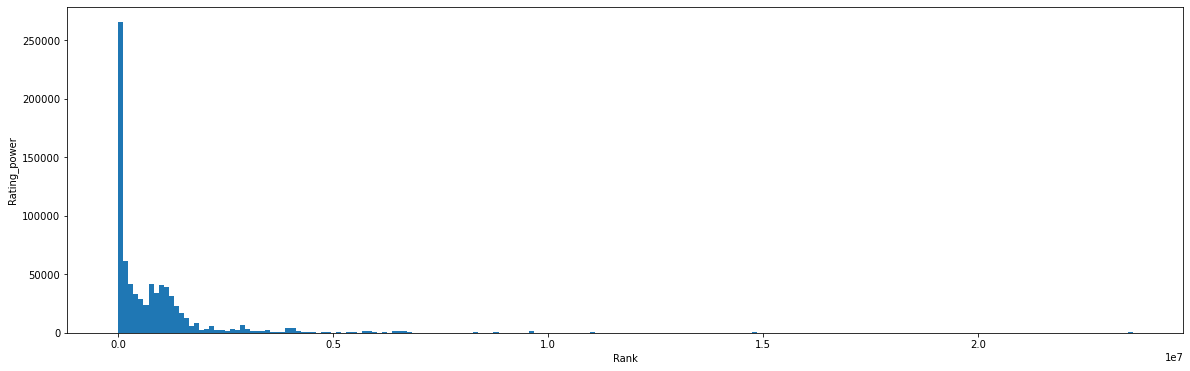

In [297]:
q1_plot('Avg_ratings', bins = 200)

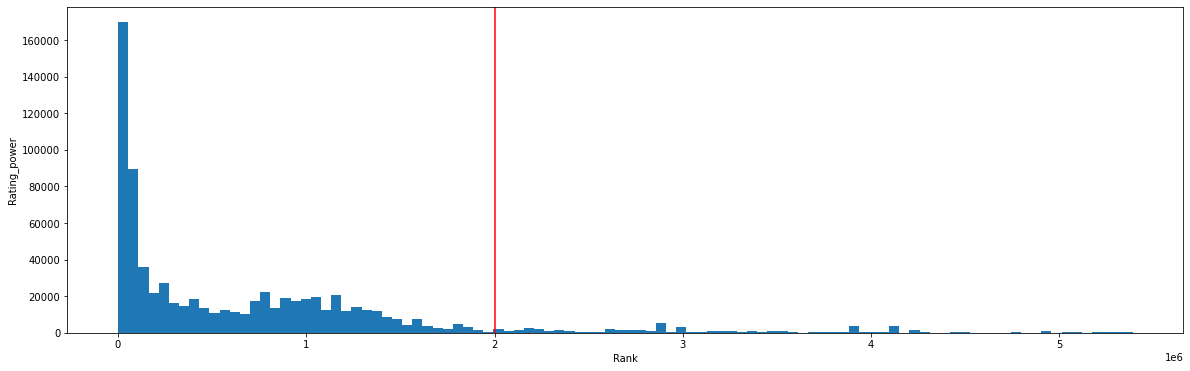

In [298]:
q1_plot('Avg_ratings', bins = 100, scope = 1600, axvline = (True, 2e6, 'r'))

# 4.2 Take num_of_helpful_reviews into consideration to see if it affects the product ranking, and refine the weighted-rating formula by vote

In [307]:
q2 = sqlc.sql('''
    SELECT rank, title, brand, ROUND(AVG(weighted_rating), 2) AS Weighted_rating, COUNT(*) AS Num_of_reviews
    FROM products
    JOIN (
        SELECT asin,
        CASE
            WHEN vote = 0 THEN overall
            ELSE overall*vote/vote
        END AS weighted_rating
        FROM reviews
    ) new_reviews
    ON products.asin = new_reviews.asin
    GROUP BY products.title, products.brand, products.rank
    ORDER BY rank ASC
    ;
    ''')


In [308]:
q2_df = q2.toPandas()

In [309]:
q2_df[:1500].corr(method = 'pearson')

,rank,Weighted_rating,Num_of_reviews
rank,1.000000,-0.004044,-0.270408
Weighted_rating,-0.004044,1.000000,-0.018467
Num_of_reviews,-0.270408,-0.018467,1.000000


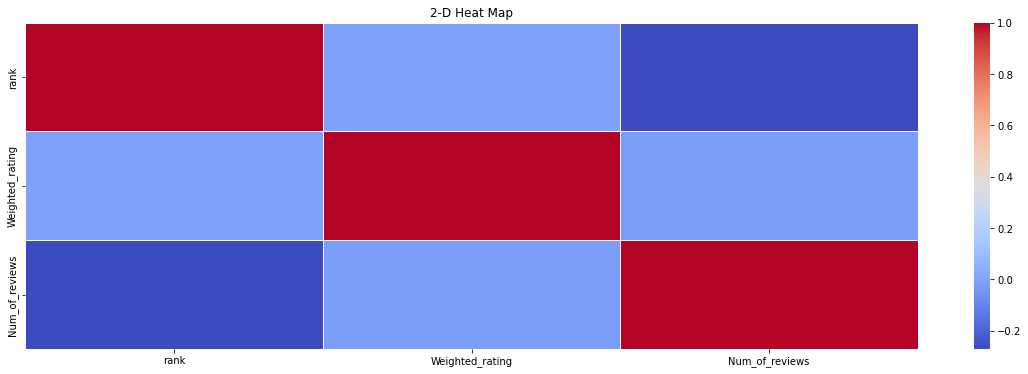

In [310]:
ax = sns.heatmap( q2_df[:1500].corr(method = 'pearson') , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()

# 4.3 Find other formula that could largely affect the product ranking

In [250]:
sqlc.sql('''
    SELECT AVG(overall), COUNT(*)
    FROM reviews
    ;
    ''').show()

+-----------------+--------+
|     avg(overall)|count(1)|
+-----------------+--------+
|3.903577082502508|  827498|
+-----------------+--------+



In [311]:
q3 = sqlc.sql('''
    SELECT DISTINCT products.rank, products.title, products.brand, new_reviews.bayes_avg
    FROM products
    JOIN (
        SELECT asin, (AVG(overall)*COUNT(*)+ 100*3.9)/(COUNT(*) + 100) AS bayes_avg
        FROM reviews
        GROUP BY asin
    ) new_reviews
    ON products.asin = new_reviews.asin
    ORDER BY rank ASC
    ;
    ''')

In [312]:
q3_df = q3.toPandas()

In [313]:
q3_df[:1500].corr(method = 'pearson')

,rank,bayes_avg
rank,1.000000,-0.167957
bayes_avg,-0.167957,1.000000


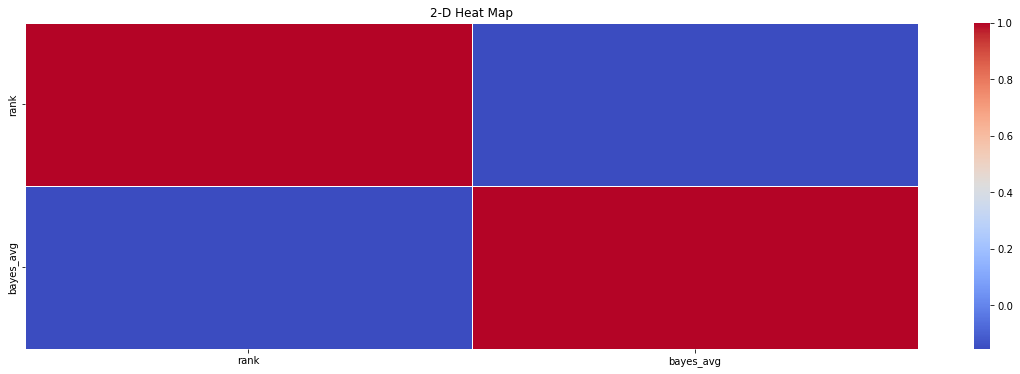

In [304]:
ax = sns.heatmap( q3_df[:1500].corr(method = 'pearson') , linewidth = 0.5 , cmap = 'coolwarm' )
  
plt.title( "2-D Heat Map" )
plt.show()